To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://unsloth.ai/docs/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your local device, follow [our guide](https://unsloth.ai/docs/get-started/install). This notebook is licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & how to save it

### News

Train MoEs - DeepSeek, GLM, Qwen and gpt-oss 12x faster with 35% less VRAM. [Blog](https://unsloth.ai/docs/new/faster-moe)

You can now train embedding models 1.8-3.3x faster with 20% less VRAM. [Blog](https://unsloth.ai/docs/new/embedding-finetuning)

Ultra Long-Context Reinforcement Learning is here with 7x more context windows! [Blog](https://unsloth.ai/docs/new/grpo-long-context)

3x faster LLM training with 30% less VRAM and 500K context. [3x faster](https://unsloth.ai/docs/new/3x-faster-training-packing) • [500K Context](https://unsloth.ai/docs/new/500k-context-length-fine-tuning)

New in Reinforcement Learning: [FP8 RL](https://unsloth.ai/docs/new/fp8-reinforcement-learning) • [Vision RL](https://unsloth.ai/docs/new/vision-reinforcement-learning-vlm-rl) • [Standby](https://unsloth.ai/docs/basics/memory-efficient-rl) • [gpt-oss RL](https://unsloth.ai/docs/new/gpt-oss-reinforcement-learning)

Visit our docs for all our [model uploads](https://unsloth.ai/docs/get-started/unsloth-model-catalog) and [notebooks](https://unsloth.ai/docs/get-started/unsloth-notebooks).

### Installation

In [1]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth  # Do this in local & cloud setups
else:
    import torch; v = re.match(r'[\d]{1,}\.[\d]{1,}', str(torch.__version__)).group(0)
    xformers = 'xformers==' + {'2.10':'0.0.34','2.9':'0.0.33.post1','2.8':'0.0.32.post2'}.get(v, "0.0.34")
    !pip install sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth_zoo bitsandbytes accelerate {xformers} peft trl triton unsloth
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2

### Unsloth

In [1]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Llama-3.2-11B-Vision-Instruct-bnb-4bit", # Llama 3.2 vision support
    "unsloth/Llama-3.2-11B-Vision-bnb-4bit",
    "unsloth/Llama-3.2-90B-Vision-Instruct-bnb-4bit", # Can fit in a 80GB card!
    "unsloth/Llama-3.2-90B-Vision-bnb-4bit",

    "unsloth/Pixtral-12B-2409-bnb-4bit",              # Pixtral fits in 16GB!
    "unsloth/Pixtral-12B-Base-2409-bnb-4bit",         # Pixtral base model

    "unsloth/Qwen2-VL-2B-Instruct-bnb-4bit",          # Qwen2 VL support
    "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit",
    "unsloth/Qwen2-VL-72B-Instruct-bnb-4bit",

    "unsloth/llava-v1.6-mistral-7b-hf-bnb-4bit",      # Any Llava variant works!
    "unsloth/llava-1.5-7b-hf-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Qwen2-VL-2B-Instruct-bnb-4bit",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2026.2.1: Fast Qwen2_Vl patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.563 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu128. CUDA: 7.5. CUDA Toolkit: 12.8. Triton: 3.5.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

We now add LoRA adapters for parameter efficient finetuning - this allows us to only efficiently train 1% of all parameters.

**[NEW]** We also support finetuning ONLY the vision part of the model, or ONLY the language part. Or you can select both! You can also select to finetune the attention or the MLP layers!

In [2]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

Unsloth: Making `model.base_model.model.model.visual` require gradients


<a name="Data"></a>
### Data Prep
We'll be using a sampled version of the ROCO radiography dataset. You can access the dataset [here](https://huggingface.co/datasets/unsloth/Radiology_mini). The full dataset is [here](https://huggingface.co/datasets/eltorio/ROCOv2-radiology).

The dataset includes X-rays, CT scans and ultrasounds showcasing medical conditions and diseases. Each image has a caption written by experts describing it. The goal is to finetune a VLM to make it a useful analysis tool for medical professionals.

In [4]:
from datasets import load_dataset

dataset = load_dataset("unsloth/Radiology_mini", split = "train")

Let's take a look at the dataset, and check what the 1st example shows:

In [5]:
dataset

Dataset({
    features: ['image', 'image_id', 'caption', 'cui'],
    num_rows: 1978
})

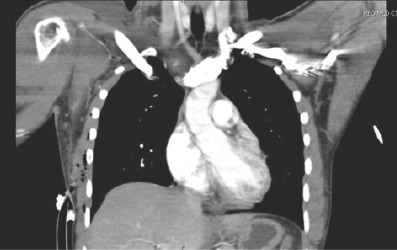

In [8]:
dataset[100]["image"]

In [9]:
dataset[0]["caption"]

'Panoramic radiography shows an osteolytic lesion in the right posterior maxilla with resorption of the floor of the maxillary sinus (arrows).'

To format the dataset, all vision finetuning tasks should be formatted as follows:

```python
[
{ "role": "user",
  "content": [{"type": "text",  "text": instruction}, {"type": "image", "image": image} ]
},
{ "role": "assistant",
  "content": [{"type": "text",  "text": answer} ]
},
]
```

We will craft an custom instruction asking the VLM to be an expert radiographer. Notice also instead of just 1 instruction, you can add multiple turns to make it a dynamic conversation.

In [5]:
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["caption"]} ]
        },
    ]
    return { "messages" : conversation }
pass

Let's convert the dataset into the "correct" format for finetuning:

In [8]:
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

The first example is now structured like below:

In [9]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are an expert radiographer. Describe accurately what you see in this image.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=657x442>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': 'Panoramic radiography shows an osteolytic lesion in the right posterior maxilla with resorption of the floor of the maxillary sinus (arrows).'}]}]}

Before we do any finetuning, maybe the vision model already knows how to analyse the images? Let's check if this is the case!

In [6]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[0]["image"]
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

This image is a panoramic dental X-ray showing a panoramic view of the oral cavity. The arrows indicate specific areas of interest:

1. **Upper Left Area**: The arrow points to the maxillary teeth, specifically the upper central incisors and the upper lateral incisors.
2. **Upper Right Area**: The arrow points to the maxillary teeth, specifically the upper central incisors and the upper lateral incisors.
3. **Lower Left Area**: The arrow points to the mandibular teeth, specifically the lower central incisors and the lower lateral incisors.
4. **Lower Right Area**: The arrow points to the mandibular


<a name="Train"></a>
### Train the model
Now let's train our model. We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support `DPOTrainer` and `GRPOTrainer` for reinforcement learning!!

We use our new `UnslothVisionDataCollator` which will help in our vision finetuning setup.

In [10]:
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.001,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # For Weights and Biases

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        max_length = 2048,
    ),
)

Unsloth: Model does not have a default image size - using 512


In [11]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.563 GB.
2.137 GB of memory reserved.


In [12]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 1,978 | Num Epochs = 1 | Total steps = 30
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 28,950,528 of 2,237,936,128 (1.29% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,3.280600
2,3.166800
3,3.119800
4,3.062800
5,2.712000
6,2.586900
7,2.379100
8,2.430700
9,2.130700
10,1.757400


In [14]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

301.2818 seconds used for training.
5.02 minutes used for training.
Peak reserved memory = 3.305 GB.
Peak reserved memory for training = 1.168 GB.
Peak reserved memory % of max memory = 22.694 %.
Peak reserved memory for training % of max memory = 8.02 %.


<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

We use `min_p = 0.1` and `temperature = 1.5`. Read this [Tweet](https://x.com/menhguin/status/1826132708508213629) for more information on why.

In [13]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[0]["image"]
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

Panoramic radiograph showing a large radiolucent lesion in the right mandibular ramus (arrows).<|im_end|>


<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Hugging Face's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [15]:
model.save_pretrained("llama_lora")  # Local saving
tokenizer.save_pretrained("llama_lora")
# model.push_to_hub("your_name/llama_lora", token = "YOUR_HF_TOKEN") # Online saving
# tokenizer.push_to_hub("your_name/llama_lora", token = "YOUR_HF_TOKEN") # Online saving

[]

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [16]:
if False:
    from unsloth import FastVisionModel
    model, tokenizer = FastVisionModel.from_pretrained(
        model_name = "llama_lora", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = True, # Set to False for 16bit LoRA
    )
    FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[0]["image"]
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

Panoramic radiograph showing a large radiolucent lesion in the right mandibular ramus (arrows).<|im_end|>


In [24]:
from datasets import load_dataset

raw = load_dataset("unsloth/Radiology_mini", split="train")
splits = raw.train_test_split(test_size=0.1, seed=3407)
train_raw, test_raw = splits["train"], splits["test"]

# Keep eval small on free T4
test_raw_small = test_raw.select(range(min(50, len(test_raw))))
len(train_raw), len(test_raw_small)


(1780, 50)

In [21]:
import torch

def generate_caption(vlm, tokenizer, image, instruction, max_new_tokens=128):
    messages = [{"role":"user","content":[{"type":"image"}, {"type":"text","text":instruction}]}]
    input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)

    inputs = tokenizer(
        image, input_text,
        add_special_tokens=False,
        return_tensors="pt",
    ).to("cuda")

    with torch.no_grad():
        out = vlm.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=False,        # important: reduces randomness for fair compare
            use_cache=True,
        )

    # decode only the newly generated part
    gen_ids = out[0][inputs["input_ids"].shape[1]:]
    return tokenizer.decode(gen_ids, skip_special_tokens=True).strip()


In [25]:
from tqdm.auto import tqdm
import time

instruction = "You are an expert radiographer. Describe accurately what you see in this image."

# Ensure inference mode
from unsloth import FastVisionModel
FastVisionModel.for_inference(model)

base_preds, ft_preds, refs = [], [], []

# Can we toggle LoRA adapters to get base behavior?
can_disable = hasattr(model, "disable_adapter") and hasattr(model, "enable_adapter")

t0 = time.time()
pbar = tqdm(test_raw_small, total=len(test_raw_small), desc="Evaluating (base vs finetuned)")

for i, s in enumerate(pbar, start=1):
    img = s["image"]
    refs.append(s["caption"])

    # Base prediction
    if can_disable:
        model.disable_adapter()
        base_preds.append(generate_caption(model, tokenizer, img, instruction))
        model.enable_adapter()
    else:
        # If you reloaded base_model/base_tokenizer in a separate cell, use that here:
        # base_preds.append(generate_caption(base_model, base_tokenizer, img, instruction))
        base_preds.append(None)

    # Finetuned prediction
    ft_preds.append(generate_caption(model, tokenizer, img, instruction))

    # progress stats
    elapsed = time.time() - t0
    avg_s = elapsed / i
    pbar.set_postfix({"avg_sec/ex": f"{avg_s:.2f}", "done": f"{i}/{len(test_raw_small)}"})


Evaluating (base vs finetuned):   0%|          | 0/50 [00:00<?, ?it/s]

In [29]:
hasattr(model, "disable_adapter"), hasattr(model, "enable_adapter")


(True, False)

In [34]:
print(type(model))
print("has disable_adapter:", hasattr(model, "disable_adapter"))
print("has enable_adapter :", hasattr(model, "enable_adapter"))


<class 'peft.peft_model.PeftModelForCausalLM'>
has disable_adapter: True
has enable_adapter : False


In [ ]:
from unsloth import FastVisionModel
FastVisionModel.for_inference(model)

instruction = "You are an expert radiographer. Describe accurately what you see in this image."

base_preds, ft_preds, refs = [], [], []

for s in test_raw_small:
    img = s["image"]
    refs.append(s["caption"])

    # BASE = adapters OFF (context manager)
    with model.disable_adapter():
        base_preds.append(generate_caption(model, tokenizer, img, instruction, max_new_tokens=64))

    # FINETUNED = adapters ON (normal)
    ft_preds.append(generate_caption(model, tokenizer, img, instruction, max_new_tokens=64))


In [ ]:
hasattr(model, "disable_adapter"), hasattr(model, "enable_adapter")

In [ ]:
import evaluate
rouge = evaluate.load("rouge")

base_rouge = rouge.compute(predictions=base_preds, references=refs)
ft_rouge   = rouge.compute(predictions=ft_preds,   references=refs)

base_rouge, ft_rouge


In [ ]:
from tqdm.auto import tqdm

base_preds, ft_preds, refs = [], [], []

for s in tqdm(test_raw_small, desc="Base vs finetuned"):
    img = s["image"]
    refs.append(s["caption"])

    with model.disable_adapter():
        base_preds.append(generate_caption(model, tokenizer, img, instruction, max_new_tokens=64))

    ft_preds.append(generate_caption(model, tokenizer, img, instruction, max_new_tokens=64))


In [27]:
from unsloth import FastVisionModel

base_model, base_tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Qwen2-VL-2B-Instruct-bnb-4bit",
    load_in_4bit=True,
    use_gradient_checkpointing="unsloth",
)
FastVisionModel.for_inference(base_model)

base_preds = []
for s in test_raw_small:
    base_preds.append(generate_caption(base_model, base_tokenizer, s["image"], instruction))


==((====))==  Unsloth 2026.2.1: Fast Qwen2_Vl patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.563 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu128. CUDA: 7.5. CUDA Toolkit: 12.8. Triton: 3.5.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [28]:
!pip -q install evaluate rouge_score --q

import evaluate
rouge = evaluate.load("rouge")

base_rouge = rouge.compute(predictions=base_preds, references=refs)
ft_rouge   = rouge.compute(predictions=ft_preds,   references=refs)

base_rouge, ft_rouge


({'rouge1': np.float64(0.10713398699508109),
  'rouge2': np.float64(0.02260647050180823),
  'rougeL': np.float64(0.08848804574599334),
  'rougeLsum': np.float64(0.09035204269675168)},
 {'rouge1': np.float64(0.19440644017412856),
  'rouge2': np.float64(0.04975289248088455),
  'rougeL': np.float64(0.17209562388677196),
  'rougeLsum': np.float64(0.17224100701680076)})

ROUGE-1: same keywords?

ROUGE-2: same short phrases?

ROUGE-L: same ordered structure?

In [30]:
for i in range(5):
    print("="*90)
    print("REF:", refs[i])
    print("\nBASE:", base_preds[i])
    print("\nFT  :", ft_preds[i])


REF: Postcontrast axial T1W MRI image also shows conglomerate nodular and ring enhancement (arrow) of the markedly thickened RA myocardium

BASE: This image is a chest MRI scan, specifically a T2-weighted image. The arrow points to a specific area within the lung tissue. Here are the key observations:

1. **Lung Tissue**: The image shows the lung tissue, which appears as a dark, irregularly shaped structure. The lung tissue is typically darker than the surrounding tissues due to its higher water content.

2. **Nodule**: There is a distinct, irregularly shaped area within the lung tissue that appears darker than the surrounding lung tissue. This could be indicative of a nodule or another type of abnormality.

3. **Other Structures**: Surrounding

FT  : Axial T2-weighted image showing a large mass in the right lung (arrow).
REF: Chest X-ray showing a mass with well-defined borders. Pulmonary parenchyma with preserved transparency.

BASE: This is a chest X-ray image of a patient. The imag

In [31]:
total = sum(p.numel() for p in model.parameters())
trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total params:     {total/1e9:.3f}B")
print(f"Trainable params: {trainable/1e6:.3f}M  ({100*trainable/total:.4f}%)")


Total params:     1.268B
Trainable params: 28.951M  (2.2827%)


In [32]:
import time, torch

def bench_one(vlm, tokenizer, sample, label):
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    torch.cuda.synchronize()

    t0 = time.time()
    _ = generate_caption(vlm, tokenizer, sample["image"], instruction, max_new_tokens=128)
    torch.cuda.synchronize()
    dt = time.time() - t0

    peak = torch.cuda.max_memory_reserved() / (1024**3)
    print(f"{label:>10} | time: {dt:.3f}s | peak_reserved: {peak:.2f} GB")

sample = test_raw_small[0]

# finetuned
bench_one(model, tokenizer, sample, "finetuned")

# base (disable adapters if possible, else use base_model)
if can_disable:
    model.disable_adapter()
    bench_one(model, tokenizer, sample, "base")
    model.enable_adapter()
else:
    bench_one(base_model, base_tokenizer, sample, "base")


 finetuned | time: 6.455s | peak_reserved: 3.30 GB
      base | time: 12.673s | peak_reserved: 3.30 GB


In [33]:
import torch, time

def bench_with_token_count(vlm, tokenizer, sample, label):
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    torch.cuda.synchronize()

    messages = [{"role":"user","content":[{"type":"image"}, {"type":"text","text":instruction}]}]
    input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
    inputs = tokenizer(sample["image"], input_text, add_special_tokens=False, return_tensors="pt").to("cuda")

    t0 = time.time()
    with torch.no_grad():
        out = vlm.generate(
            **inputs,
            max_new_tokens=128,
            do_sample=False,
            use_cache=True,
            return_dict_in_generate=True,
        )
    torch.cuda.synchronize()
    dt = time.time() - t0

    gen_tokens = out.sequences.shape[1] - inputs["input_ids"].shape[1]
    peak = torch.cuda.max_memory_reserved() / (1024**3)

    print(f"{label:>10} | time: {dt:.3f}s | gen_tokens: {gen_tokens:3d} | tok/s: {gen_tokens/dt:.1f} | peak: {peak:.2f} GB")

sample = test_raw_small[0]
bench_with_token_count(model, tokenizer, sample, "finetuned")
bench_with_token_count(base_model, base_tokenizer, sample, "base")


 finetuned | time: 7.230s | gen_tokens:  19 | tok/s: 2.6 | peak: 3.30 GB
      base | time: 12.723s | gen_tokens: 128 | tok/s: 10.1 | peak: 3.30 GB


### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens. See [our docs](https://unsloth.ai/docs/basics/inference-and-deployment) for more deployment options.

In [ ]:
# Select ONLY 1 to save! (Both not needed!)

# Save locally to 16bit
if False: model.save_pretrained_merged("unsloth_finetune", tokenizer,)

# To export and save to your Hugging Face account
if False: model.push_to_hub_merged("YOUR_USERNAME/unsloth_finetune", tokenizer, token = "YOUR_HF_TOKEN")

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other resources:
1. Looking to use Unsloth locally? Read our [Installation Guide](https://unsloth.ai/docs/get-started/install) for details on installing Unsloth on Windows, Docker, AMD, Intel GPUs.
2. Learn how to do Reinforcement Learning with our [RL Guide and notebooks](https://unsloth.ai/docs/get-started/reinforcement-learning-rl-guide).
3. Read our guides and notebooks for [Text-to-speech (TTS)](https://unsloth.ai/docs/basics/text-to-speech-tts-fine-tuning) and [vision](https://unsloth.ai/docs/basics/vision-fine-tuning) model support.
4. Explore our [LLM Tutorials Directory](https://unsloth.ai/docs/models/tutorials-how-to-fine-tune-and-run-llms) to find dedicated guides for each model.
5. Need help with Inference? Read our [Inference & Deployment page](https://unsloth.ai/docs/basics/inference-and-deployment) for details on using vLLM, llama.cpp, Ollama etc.

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://unsloth.ai/docs/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️

  This notebook and all Unsloth notebooks are licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme)
</div>